In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prediction Plot

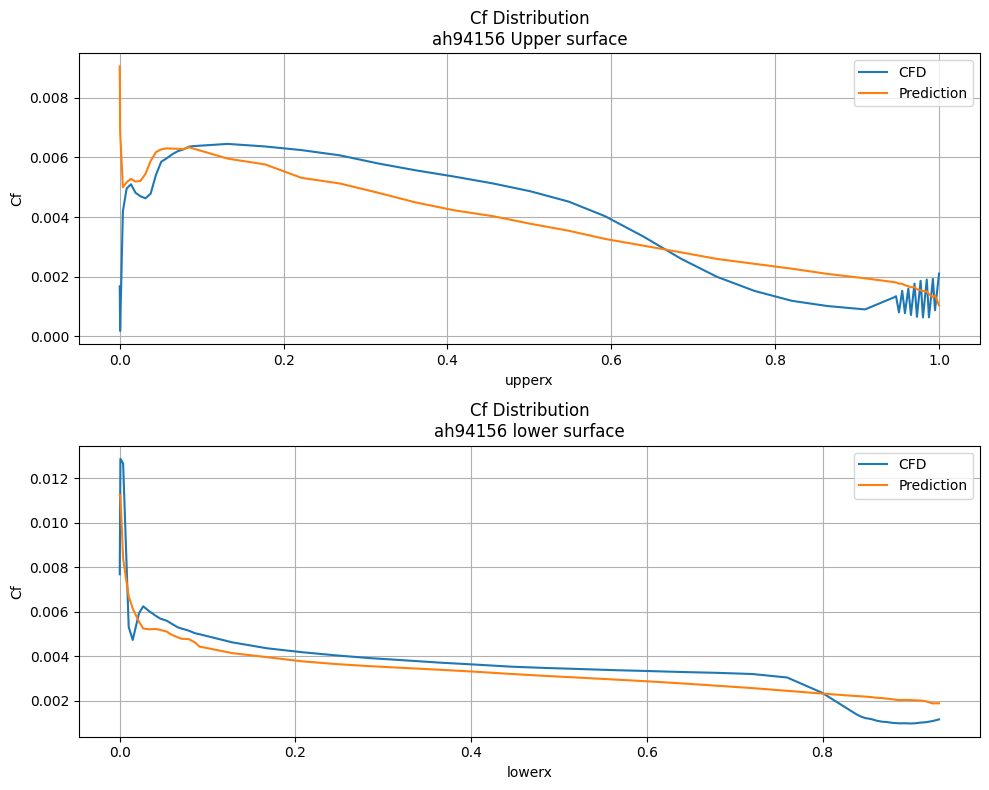

In [9]:

dataDir = 'test_dataset/prediction_dataset/data/'
fileLst = os.listdir(dataDir)
tmp = []
for fileName in fileLst:
    filepath = dataDir + fileName
    data = np.load(filepath)
    airfoil = fileName.split('_')[0]

prediction = np.load('temp/predictions.npy')
predic_upper = prediction[:,:51].reshape(51)
predic_lower = prediction[:,51:102].reshape(51)
data_df = pd.DataFrame({'upperx':data['upper'][0],
                        'uppercf':data['upper'][1],
                        'upperPredic':predic_upper,
                        'lowerx':data['lower'][0],
                        'lowercf':data['lower'][1],
                        'lowerPredic':predic_lower
                        })

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
uppertitle = f'Cf Distribution\n{airfoil} Upper surface'
lowewrtitle = f'Cf Distribution\n{airfoil} lower surface'
data_df.plot(kind='line',x='upperx',y='uppercf',xlabel='x postition',ylabel='Cf',title=uppertitle,label='CFD',ax=ax1)
data_df.plot(kind='line',x='upperx',y='upperPredic',ax=ax1,label='Prediction')
ax1.grid()

data_df.plot(kind='line',x='lowerx',y='lowercf',xlabel='x postition',ylabel='Cf',title=lowewrtitle ,label='CFD',ax=ax2)
data_df.plot(kind='line',x='lowerx',y='lowerPredic',ax=ax2,label='Prediction')
ax2.grid()

plt.tight_layout()

# Training Loss

Text(0.5, 1.0, 'loss variation')

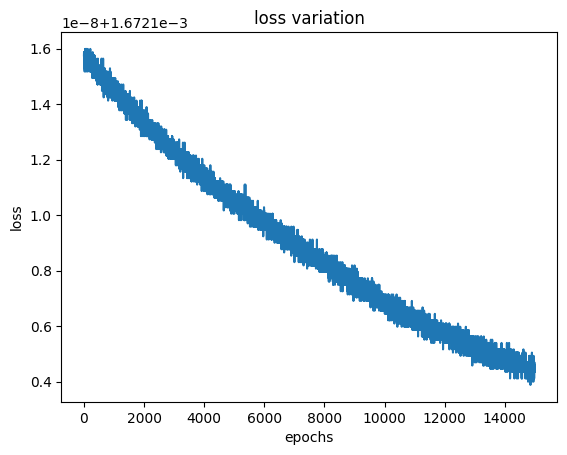

In [12]:
loss_data=np.load('temp/Training loss data.npy')
plt.plot(loss_data[0][35000:50000])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss variation')